In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


df = pd.read_csv('kashti.to_csv')

df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


<AxesSubplot:title={'center':'Missing values'}, ylabel='count'>

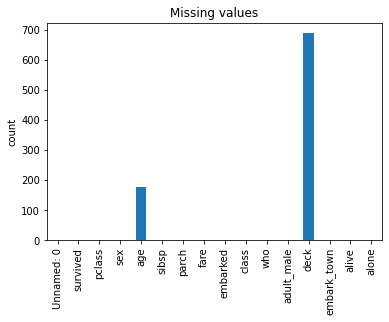

In [4]:
df1=df.isnull().sum()
df1.plot(kind='bar',title='Missing values',ylabel='count')


In [5]:
df.drop(['deck','Unnamed: 0'],axis=1,inplace=True)

In [6]:
df['age'].fillna(df['age'].mean(), inplace=True)



In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [8]:
df.dropna(subset=['embarked'],inplace=True)

In [9]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [10]:
df['sex'] = OneHotEncoder().fit_transform(df[['sex']]).toarray()
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0.0,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1.0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1.0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1.0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0.0,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0.0,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1.0,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1.0,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1.0,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0.0,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,1.0,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,1.0,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,0.0,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<AxesSubplot:xlabel='age', ylabel='fare'>

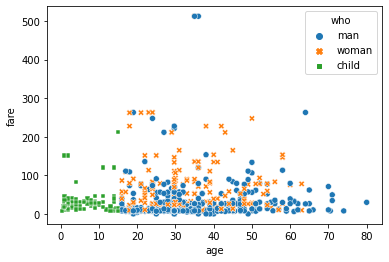

In [12]:
sns.scatterplot(data=df,x='age',y='fare',hue='who',style='who')

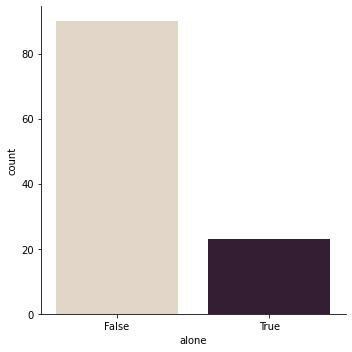

In [13]:
children = df[df['age']< 18]

sns.catplot(data=children, x="alone", kind="count", palette="ch:.25")



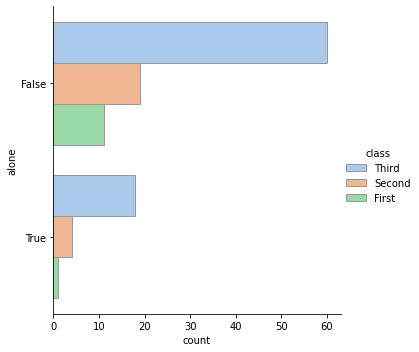

In [14]:
sns.catplot(
    data=children, y="alone", hue="class", kind="count",
    palette="pastel", edgecolor=".6",)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaled_data = StandardScaler().fit_transform(df[['fare']])





In [17]:
scaled_data.mean()

1.3987061727561027e-16